# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# 1. Exploratory Data Analysis and Visuaization

In [119]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [120]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [122]:
df.shape

(900, 8)

In [123]:
df.duplicated().sum()

0

In [124]:
df.isnull().sum().any()

False

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [126]:
df["Class"].value_counts() ##Balance

Kecimen    450
Besni      450
Name: Class, dtype: int64

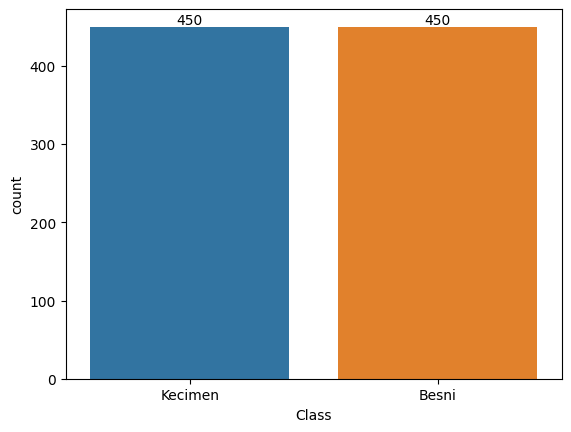

In [127]:
ax = sns.countplot(x = df["Class"])
ax.bar_label(ax.containers[0]);

In [128]:
df["Class"] = df["Class"].map({"Kecimen":0, "Besni":1})

In [129]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


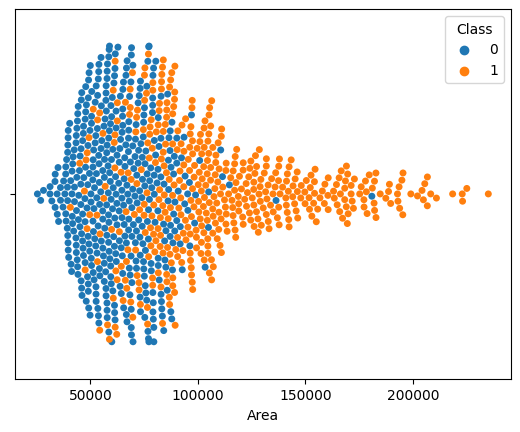

In [134]:
ax = sns.swarmplot(x = "Area",
                   hue = "Class",
                   data = df)
plt.show()

In [135]:
df.iloc[:,:-1].iplot(kind="box")

In [136]:
fig = px.box(df, color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()

In [137]:
df.iplot(kind="bar")

In [138]:
fig = px.bar(df, x=df.index, y="Area", color="Class", color_discrete_map={"Kecimen":'#FF00F0',"Besni":'#ª000FF'})
fig.show();

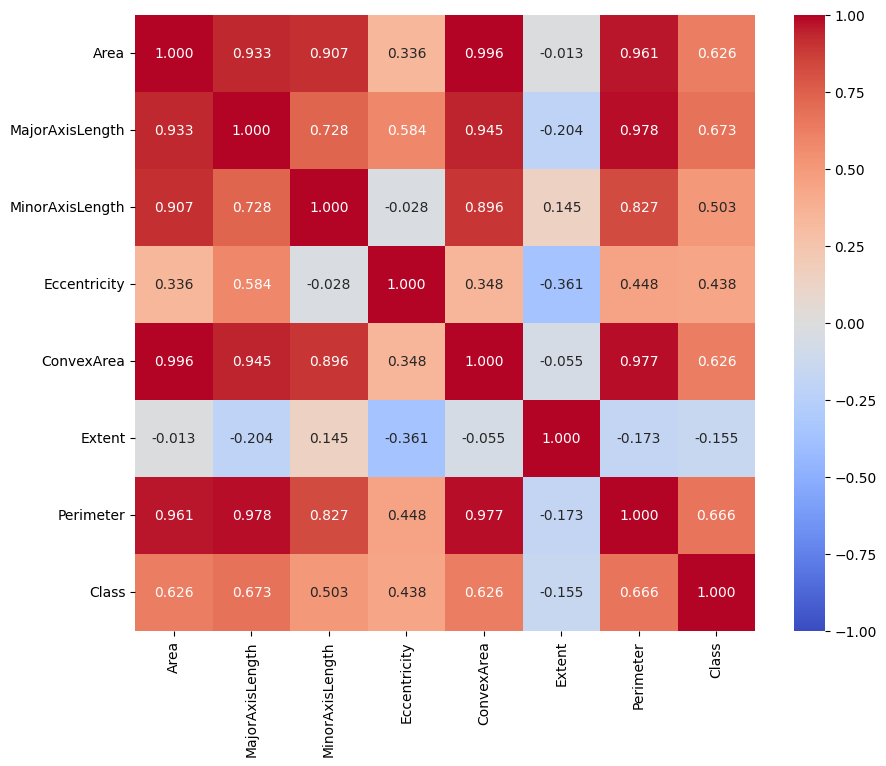

In [139]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='coolwarm');

In [140]:
corr_matrix = df.corr()
fig = px.imshow(corr_matrix)
fig.show();

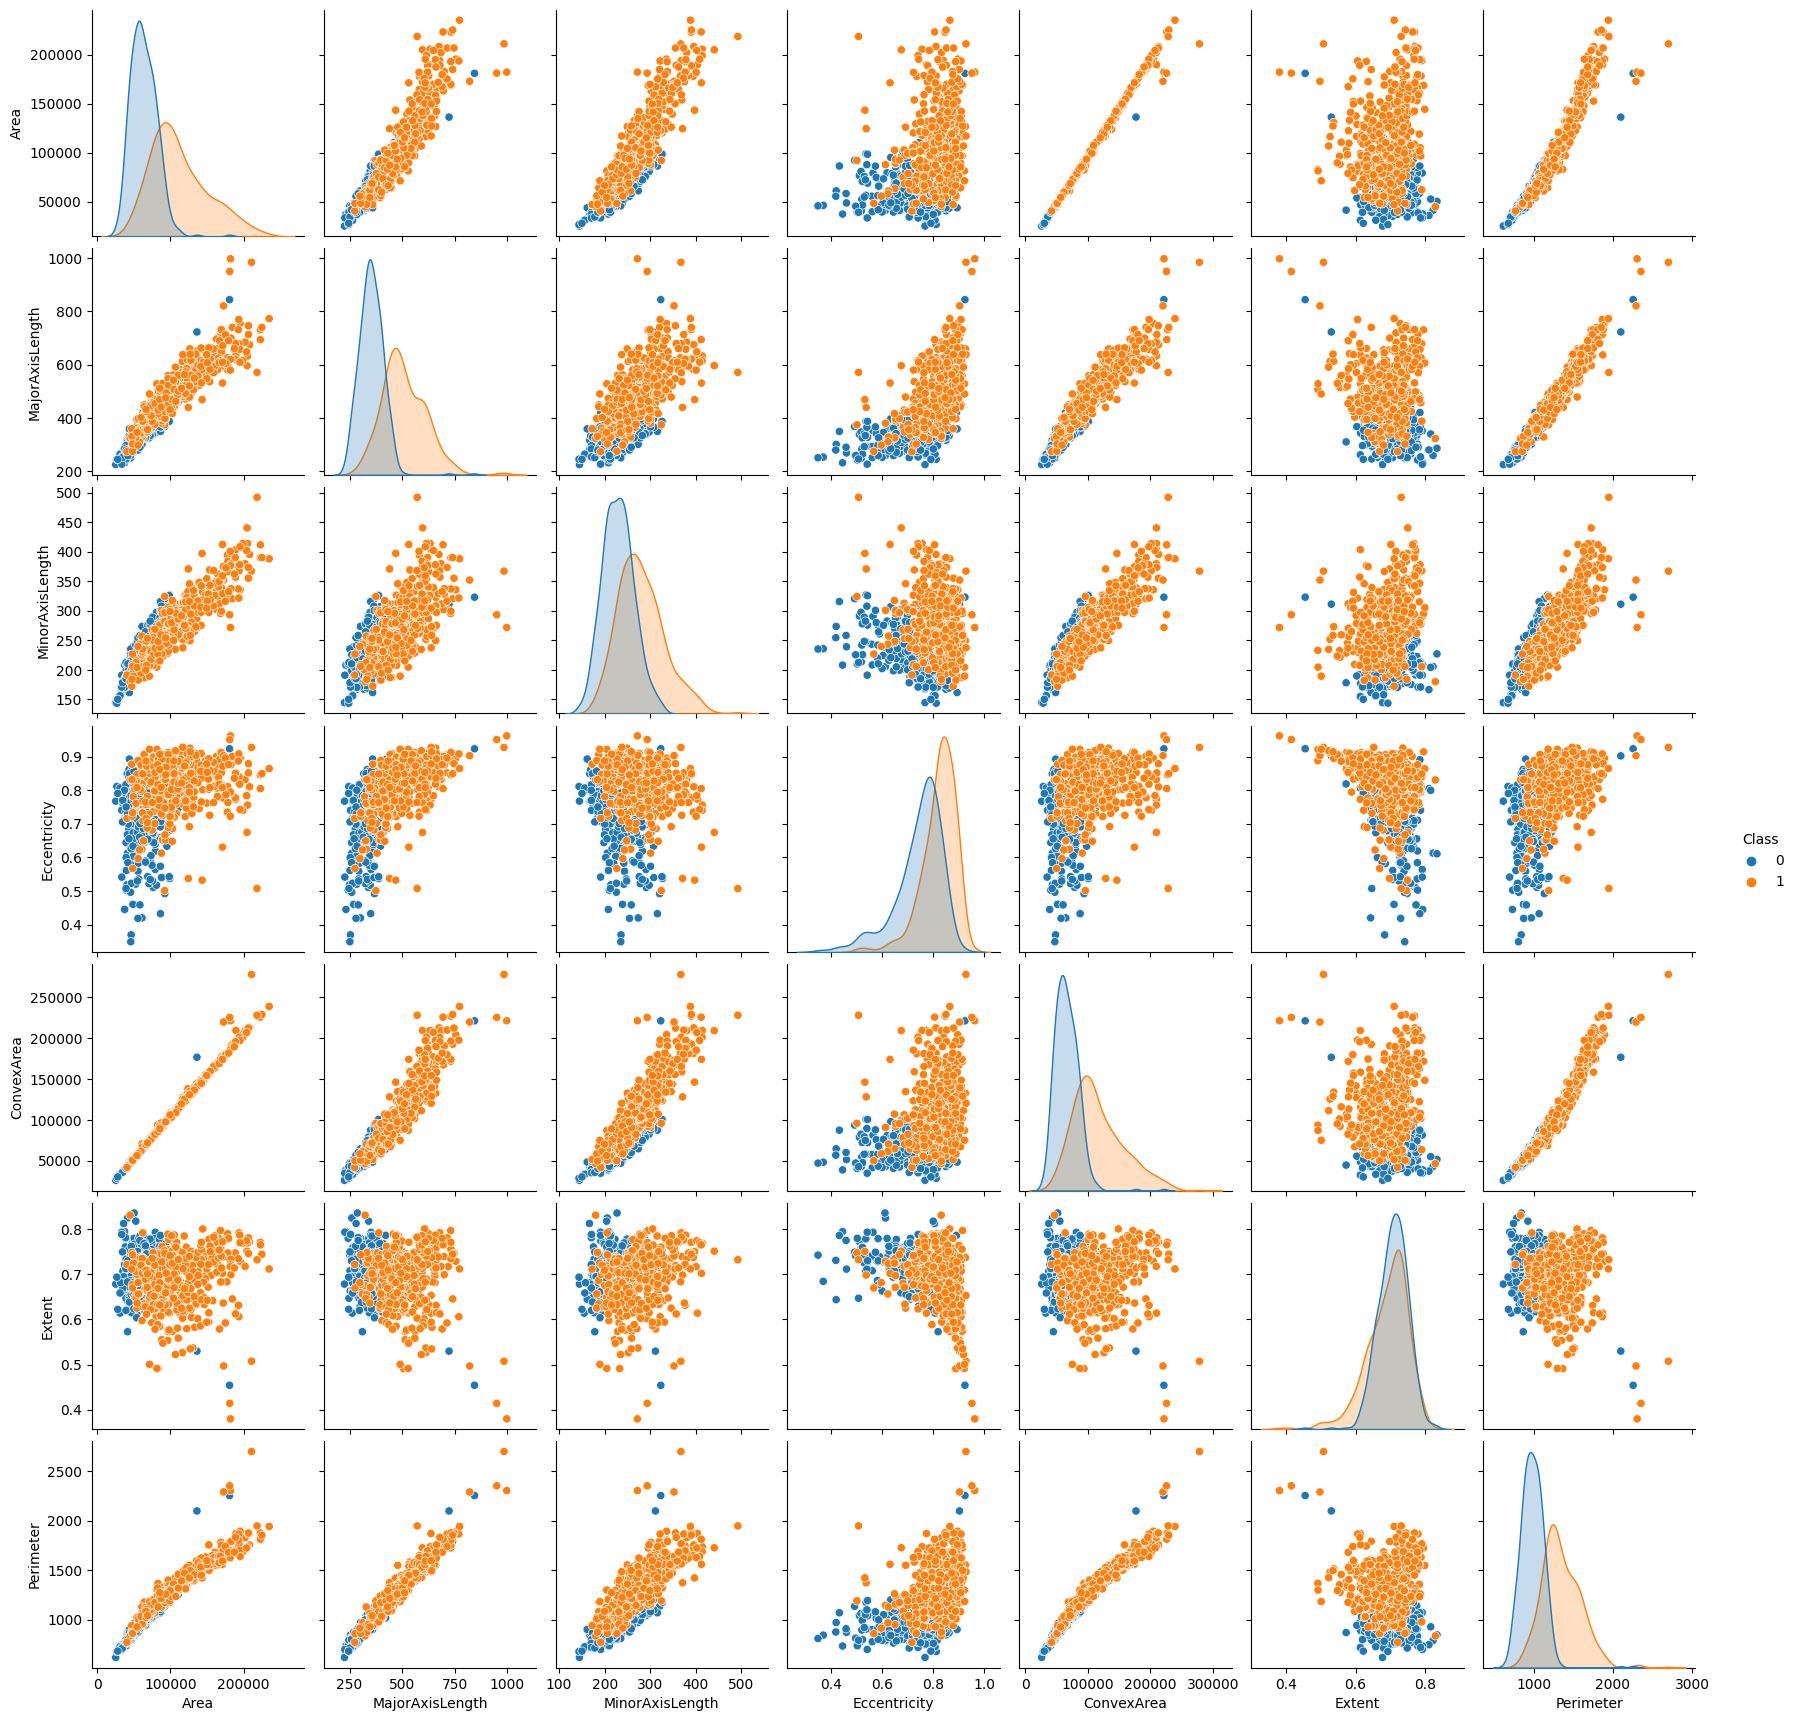

In [141]:
sns.pairplot(df,hue = "Class");

In [142]:
fig = px.scatter_3d(df, x = "Perimeter", y = "Area", z = "Extent", color = "Class")
fig.show()

## 2.  Train | Test Split and Scaling

In [143]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

## 3. Logistic Regression without Pipeline

### Scaling

In [145]:
scaler = StandardScaler()

In [146]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

In [147]:
log_model = LogisticRegression()

In [148]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [149]:
log_model.coef_

array([[-0.00062589, -0.02341984, -0.06778539, -0.00035299,  0.00078995,
        -0.0003472 ,  0.00996094]])

## 4. Logistic Regression with Pipeline

In [150]:
scaler = StandardScaler()

In [151]:
log_model = LogisticRegression()

In [152]:
log_pipe = Pipeline([("scaler", scaler), ("log_model", log_model)])

In [153]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [154]:
y_pred = log_pipe.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0])

In [155]:
y_pred_proba = log_pipe.predict_proba(X_test)
y_pred_proba

array([[9.09233226e-01, 9.07667744e-02],
       [2.13923600e-01, 7.86076400e-01],
       [8.61366061e-01, 1.38633939e-01],
       [9.75006614e-01, 2.49933859e-02],
       [7.18428741e-01, 2.81571259e-01],
       [9.78090204e-01, 2.19097960e-02],
       [9.67153729e-01, 3.28462709e-02],
       [2.69784269e-01, 7.30215731e-01],
       [6.22413524e-01, 3.77586476e-01],
       [8.28165778e-01, 1.71834222e-01],
       [5.50087417e-01, 4.49912583e-01],
       [6.48124125e-01, 3.51875875e-01],
       [1.33636635e-03, 9.98663634e-01],
       [7.34673174e-03, 9.92653268e-01],
       [2.22192344e-04, 9.99777808e-01],
       [4.06025195e-03, 9.95939748e-01],
       [1.03563509e-04, 9.99896436e-01],
       [2.05679569e-01, 7.94320431e-01],
       [8.80378670e-01, 1.19621330e-01],
       [7.27309014e-01, 2.72690986e-01],
       [9.54065988e-01, 4.59340125e-02],
       [6.00635256e-04, 9.99399365e-01],
       [7.48381106e-01, 2.51618894e-01],
       [9.86770325e-01, 1.32296753e-02],
       [2.814178

In [156]:
## 4.1 X_test + y_tets + y_pred + y_pred_proba

In [157]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793,0
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,1
...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093,0
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712,1


In [158]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793,0,0.090767
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1,0.786076
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0,0.138634
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0,0.024993
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,1,0.281571
...,...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093,0,0.241597
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0,0.777250
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0,0.169532
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712,1,0.999524


In [159]:
test_data["pred"] = y_pred
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793,0,0.090767,0
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680,1,0.786076,1
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016,0,0.138634,0
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0,0.024993,0
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491,1,0.281571,0
...,...,...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093,0,0.241597,0
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330,0,0.777250,1
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0,0.169532,0
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712,1,0.999524,1


In [160]:
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
732,98260,520.103078,245.209759,0.881885,103918,0.576457,1345.687,1,0.985841,1
822,62280,388.582055,205.514392,0.848695,63596,0.791440,977.906,1,0.173443,0
140,49175,281.431421,224.485896,0.603111,50672,0.727613,845.128,0,0.020318,0
40,95245,397.094114,307.273922,0.633422,97988,0.753044,1201.390,0,0.388618,0
791,138202,556.981907,318.252801,0.820680,143228,0.697215,1576.336,1,0.996136,1
313,38724,291.001092,170.776267,0.809690,40133,0.780883,769.691,0,0.016696,0
500,143386,469.276508,397.310190,0.532160,146328,0.750260,1422.014,1,0.819207,1
677,144973,614.814926,304.331531,0.868895,150534,0.733669,1539.429,1,0.997637,1
682,106923,591.115838,234.823346,0.917709,111428,0.522279,1425.109,1,0.998294,1
522,177206,699.618264,328.112136,0.883205,181412,0.739153,1754.378,1,0.999894,1


## 5. Model Performance

In [161]:
accuracy_score(y_test, y_pred)

0.8722222222222222

In [162]:
log_pipe.score(X_test, y_test)

0.8722222222222222

In [163]:
precision_score(y_test, y_pred, pos_label = 1)

0.8941176470588236

In [164]:
recall_score(y_test, y_pred, pos_label = 1)

0.8444444444444444

In [165]:
f1_score(y_test, y_pred)

0.8685714285714287

In [166]:
confusion_matrix(y_test, y_pred)

array([[81,  9],
       [14, 76]])

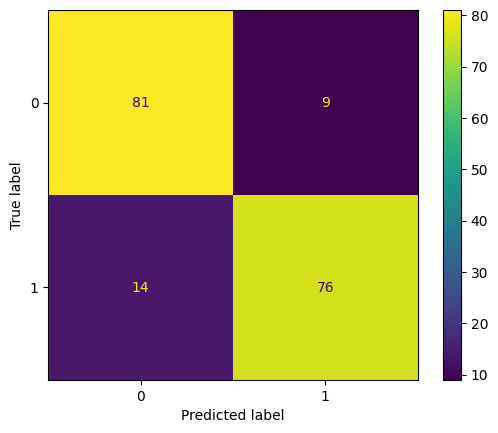

In [167]:
ConfusionMatrixDisplay.from_estimator(log_pipe, X_test, y_test);

In [168]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [169]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### 6. Cross Validate

In [170]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [171]:
model = Pipeline([("scaler",scaler),("log_model",log_model)])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.023100,0.018282,0.935484,0.881789,0.805556,0.851852,0.865672,0.866562,0.875000,0.868827
2,0.026180,0.019111,0.857143,0.878981,0.833333,0.851852,0.845070,0.865204,0.847222,0.867284
3,0.034369,0.022720,0.842105,0.887097,0.888889,0.848765,0.864865,0.867508,0.861111,0.870370
4,0.022656,0.021054,0.767442,0.879365,0.916667,0.854938,0.835443,0.866980,0.819444,0.868827
5,0.027222,0.016093,0.933333,0.876972,0.777778,0.858025,0.848485,0.867395,0.861111,0.868827
6,0.022788,0.013795,0.903226,0.869159,0.777778,0.861111,0.835821,0.865116,0.847222,0.865741
7,0.020470,0.016819,0.942857,0.875399,0.916667,0.845679,0.929577,0.860283,0.930556,0.862654
8,0.016720,0.012892,0.804878,0.882166,0.916667,0.854938,0.857143,0.868339,0.847222,0.870370
9,0.022190,0.016937,0.857143,0.871069,0.833333,0.854938,0.845070,0.862928,0.847222,0.864198
10,0.022187,0.014686,0.967742,0.875796,0.833333,0.848765,0.895522,0.862069,0.902778,0.864198


In [172]:
df_scores.mean()[2:]

test_precision     0.881135
train_precision    0.877779
test_recall        0.850000
train_recall       0.853086
test_f1            0.862267
train_f1           0.865238
test_accuracy      0.863889
train_accuracy     0.867130
dtype: float64

In [173]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



###  7. GridSearchCV

In [174]:
log_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('log_model', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'log_model': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log_model__C': 1.0,
 'log_model__class_weight': None,
 'log_model__dual': False,
 'log_model__fit_intercept': True,
 'log_model__intercept_scaling': 1,
 'log_model__l1_ratio': None,
 'log_model__max_iter': 100,
 'log_model__multi_class': 'auto',
 'log_model__n_jobs': None,
 'log_model__penalty': 'l2',
 'log_model__random_state': None,
 'log_model__solver': 'lbfgs',
 'log_model__tol': 0.0001,
 'log_model__verbose': 0,
 'log_model__warm_start': False}

In [175]:
from sklearn.model_selection import GridSearchCV

model = Pipeline([("scaler",scaler),("log_model",log_model)]) 

penalty = ["l1", "l2"] 

C = np.logspace(-1, 5, 20) 

class_weight= ["balanced", None] 

solver = ["lbfgs", "liblinear", "sag", "saga"] 

param_grid = {"log_model__penalty" : penalty,
              "log_model__C" : [C,1],
              "log_model__class_weight":class_weight,
              "log_model__solver":solver} 

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1) 

In [176]:
grid_model.fit(X_train, y_train)

/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/evliya/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [177]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [178]:
grid_model.best_index_

17

In [179]:
grid_model.best_score_

0.8652777777777778

In [180]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[79 11]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[316  44]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.87      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



##  8. ROC (Receiver Operating Curve) 

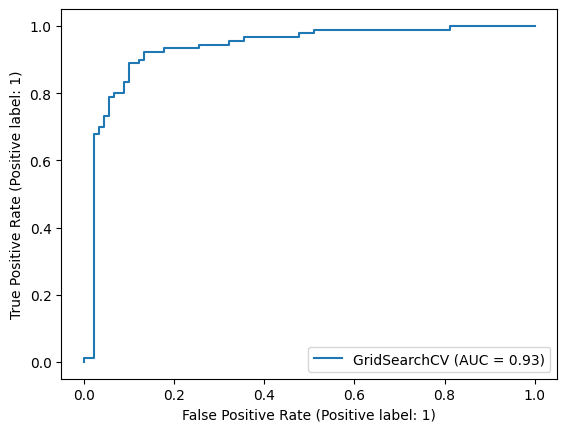

In [188]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test);

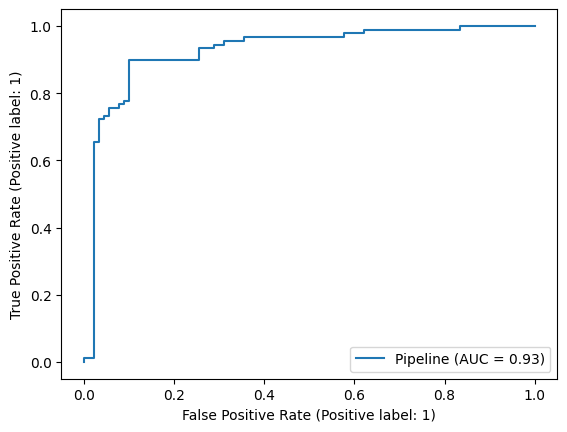

In [189]:
RocCurveDisplay.from_estimator(log_pipe, X_test, y_test);

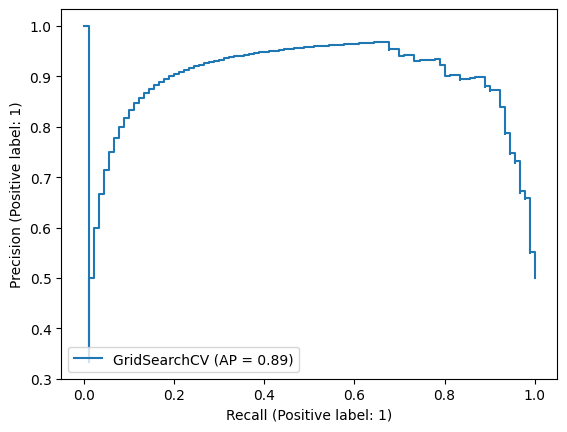

In [190]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

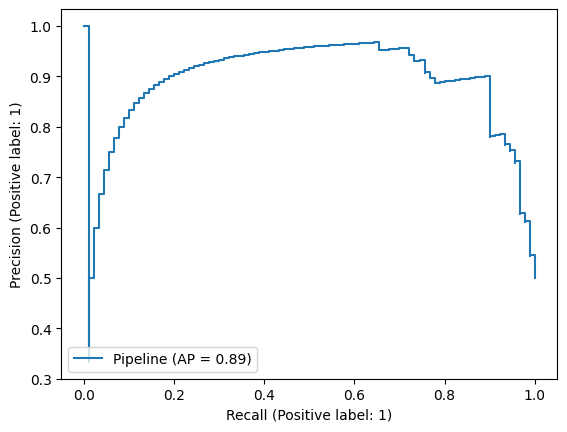

In [191]:
PrecisionRecallDisplay.from_estimator(log_pipe, X_test, y_test);

In [192]:
average_precision_score(y_test, y_pred_proba[:,1])

0.8870128026631419

# Conclusion